**Importing Libraries**

In [36]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [5]:
dir_lst=os.listdir('/kaggle/input/digit-recognizer/')
for i in dir_lst:
    print('/kaggle/input/digit-recognizer'+'/'+i)

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


**Dataset**

In [6]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(42000, 785)

In [12]:
x_train=df.drop('label',axis=1)
y=df.label

**Data Analysis**

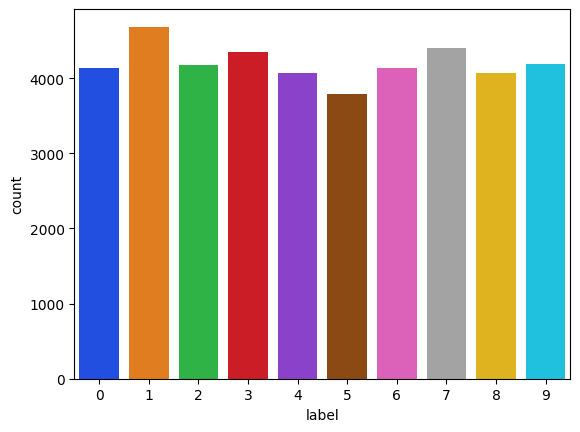

In [11]:
sns.countplot(x='label',data=df,palette='bright')
plt.show()

In [13]:
x=x_train.values.reshape(-1,28,28,1)

In [15]:
x[0].shape

(28, 28, 1)

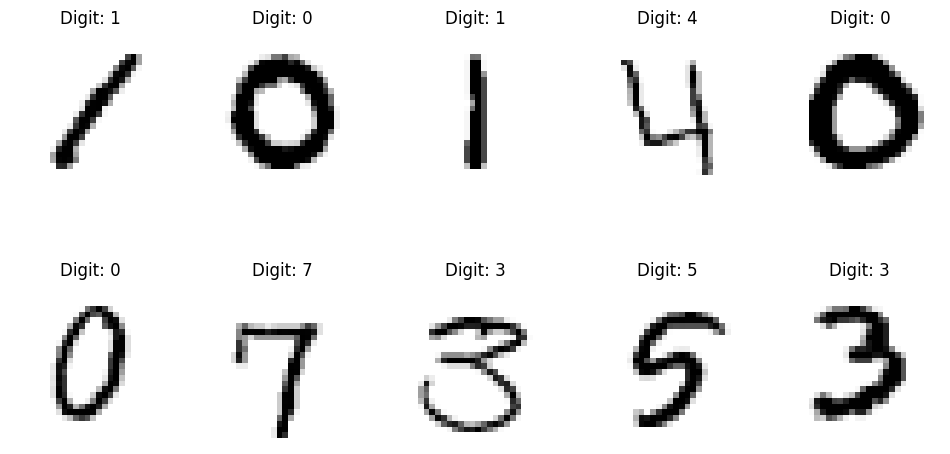

In [17]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i], cmap="binary") 
    plt.title(f"Digit: {y[i]}")  
    plt.axis('off')
plt.show()

**Data Preprocessing**

In [18]:
x=np.array(x)/255

In [19]:
from keras.utils import to_categorical
y=to_categorical(y)

In [20]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Splitting Data for Training and Testing**

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=42)

In [24]:
print(x_train.shape,x_test.shape)

(37800, 28, 28, 1) (4200, 28, 28, 1)


**Model Building and Training**

In [25]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 ),metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 564,138 (2.15 MB)

 Trainable params: 564,138 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

**Data Augmentation**

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,          
    width_shift_range=0.1,      
    height_shift_range=0.1,     
    zoom_range=0.1,             
    horizontal_flip=False,      
    vertical_flip=False,        
)

datagen.fit(x_train)

In [31]:
hist=model.fit(datagen.flow(x_train, y_train, batch_size=256), 
                epochs=50)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/148 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.1076 - loss: 2.2998 

I0000 00:00:1718725004.951408     423 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


148/148 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - accuracy: 0.5651 - loss: 1.2206
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9402 - loss: 0.2033
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9585 - loss: 0.1359
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9358 - loss: 0.2822
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9666 - loss: 0.1118
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9702 - loss: 0.0965
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9751 - loss: 0.0870
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9803 - loss: 0.0666
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9734 - loss: 0.0983
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9727 - loss: 0.1103
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9719 - loss: 0.0958
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━

**Making Predictions on Test Data**

In [32]:
pred=model.predict(x_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [33]:
pred_val=[]
for i in pred:
    pred_val.append(np.argmax(i))

In [38]:
orginal_values=[]
for i in y_test:
    orginal_values.append(np.argmax(i))

In [39]:
print(f"Accuracy score:{accuracy_score(pred_val,orginal_values)}")

Accuracy score:0.9938095238095238


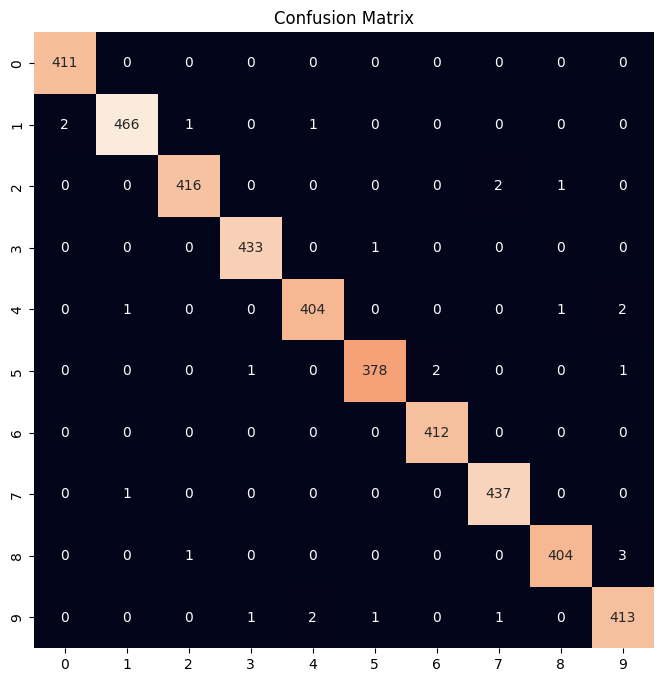

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(pred_val,orginal_values),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix')
plt.show()